# <font color='navy' size='6px'>Advanced Applied Machine Learning - DATA 441</font>

## Main References:


<table><tr>
<td> <img src='https://m.media-amazon.com/images/I/81kAZnv3-sL._SY522_.jpg'width='300px'/><figcaption><a href="https://www.amazon.com/Programming-PyTorch-Deep-Learning-Applications/dp/1492045357/ref=sr_1_1?crid=17LZV9ZGD8IN8&keywords=ian+Pointer+Pytorch&qid=1705797579&sprefix=ian+pointer+pytorch%2Caps%2C98&sr=8-1" target="_blank">Programming PyTorch for Deep Learning</a></figcaption> </td>
<td> <img src='https://m.media-amazon.com/images/I/61NfFcHXGxL._SY522_.jpg'width='335px'/>
<figcaption><a href="https://www.amazon.com/Machine-Learning-Probabilistic-Perspective-Computation/dp/0262018020/ref=sr_1_1?crid=2XEYSNAJG77SK&keywords=Machine+learning+a+probabilistic+perspective&qid=1705788801&sprefix=machine+learning+a+probabilistic+perspective%2Caps%2C101&sr=8-1&ufe=app_do%3Aamzn1.fos.18ed3cb5-28d5-4975-8bc7-93deae8f9840" target="_blank">Machine Learning: A Probabilistic Perspective</a></figcaption> </td>
</tr></table>

## Github Repositories

Create a portfolio for your data projects.

https://docs.github.com/en/pages/quickstart

# <font color='navy' size='6px'> PyTorch vs NumPy </font>

In [1]:
import torch
import numpy as np

In [ ]:
print(torch.cuda.is_available())

False


In [19]:
# in Pytorch we have to decide on the device that is performing the caluclations and the type of variables
device = torch.device("cpu")
dtype = torch.float64

In [ ]:
# Generate a 3x3 matrix with entries samples from a uniform distribution
a = torch.rand(3,3)
print(a)

tensor([[0.4961, 0.0681, 0.6954],
        [0.0908, 0.6012, 0.2204],
        [0.0552, 0.4840, 0.4889]])


In [ ]:
a.view(1,9)

tensor([[0.4961, 0.0681, 0.6954, 0.0908, 0.6012, 0.2204, 0.0552, 0.4840, 0.4889]])

In [ ]:
a.flatten()

tensor([0.4961, 0.0681, 0.6954, 0.0908, 0.6012, 0.2204, 0.0552, 0.4840, 0.4889])

In [ ]:
a

tensor([[0.1889, 0.3893, 0.6438],
        [0.2011, 0.1289, 0.4429],
        [0.4893, 0.9073, 0.1771]])

<font size=5px> Most functions that operate on a tensor and return a tensor create a new tensor to store the result. However, if you want to save memory, look to see if an inplace function is defined, which should be the same name as the original function but with an appended underscore (_).

In [ ]:
a.log2()

tensor([[-1.0112, -3.8770, -0.5242],
        [-3.4616, -0.7342, -2.1815],
        [-4.1803, -1.0469, -1.0325]])

In [ ]:
a # this means that the we saw log2 transformation of a, but "a" itself hasn't changed.

tensor([[0.4961, 0.0681, 0.6954],
        [0.0908, 0.6012, 0.2204],
        [0.0552, 0.4840, 0.4889]])

In [ ]:
a.log2_() # here we just replaced a with log2(a).

tensor([[-1.0112, -3.8770, -0.5242],
        [-3.4616, -0.7342, -2.1815],
        [-4.1803, -1.0469, -1.0325]])

In [ ]:
a # the verification that the replacement took place.

tensor([[-1.0112, -3.8770, -0.5242],
        [-3.4616, -0.7342, -2.1815],
        [-4.1803, -1.0469, -1.0325]])

In [ ]:
# the following is a tensor registered with single precision
u = torch.tensor([[0,0,1],[1,1,1],[0,0,0]]).to(dtype=torch.float32)

In [ ]:
u

tensor([[0., 0., 1.],
        [1., 1., 1.],
        [0., 0., 0.]])

In [ ]:
# the following is a tensor registered with double precision
v = torch.tensor([[2,-3,4],[3,9,1],[1,5,2]]).to(dtype=torch.float64)

In [ ]:
v

tensor([[ 2., -3.,  4.],
        [ 3.,  9.,  1.],
        [ 1.,  5.,  2.]], dtype=torch.float64)

In [ ]:
# what happens if we try to mix precisions?
u + v

tensor([[ 2., -3.,  5.],
        [ 4., 10.,  2.],
        [ 1.,  5.,  2.]], dtype=torch.float64)

## Broadcasting


Broadcasting in NumPy is a powerful feature that allows you to perform element-wise operations on arrays of different shapes without explicitly looping through them. It basically "stretches" the smaller array to match the shape of the larger one, enabling efficient calculations.

The main ideas:

- Arrays with compatible shapes can directly perform element-wise operations.
- If arrays have different shapes, broadcasting kicks in under certain conditions:
  * Dimensions with the same size are treated normally.

  * Dimensions with size 1 can be "stretched" to match any other dimension. This is the core of broadcasting. For example, a scalar (dimension size 0) can be stretched to match any larger dimension.

- Arrays with more dimensions than others are prepended with implicit dimensions of size 1 to match the others.

### Example

Imagine having an array of temperatures temperature_city for each city (shape: (3,)), and an array of wind speeds wind_speed for each day (shape: (5,)). You want to calculate the wind chill factor for each city on each day. Normally, you'd need to loop, but broadcasting comes to the rescue!

wind_speed gets stretched to have a shape of (3, 5) by duplicating its values across the city dimension.
Each element of temperature_city is element-wise multiplied with the corresponding "stretched" elements of wind_speed.
The result is an array of wind chill factors with shape (3, 5), one for each city on each day.
Essentially, broadcasting saves you from tedious loops and unnecessary data copying, making your code concise and efficient.

### Important

Not all combinations of shapes are broadcastable. For example, an array of (2,) cannot be broadcast to an array of (3,).
The order of operations can matter with broadcasting, as stretching happens earlier than element-wise operations.

In [ ]:
# coding example in NumPy
import numpy as np

# City temperatures (3 cities)
temperature_city = np.array([20, 15, 10])

# Wind speeds for each day (5 days)
wind_speed = np.array([5, 10, 15, 20, 25])

# Calculate wind chill factor using broadcasting
wind_chill = temperature_city[:, np.newaxis] * (0.6215 + 0.3387 * wind_speed) ** 0.16

print("Wind chill factor for each city on each day:")
print(wind_chill)

Wind chill factor for each city on each day:
[[22.87484473 24.97509206 26.42374379 27.546397   28.47033466]
 [17.15613355 18.73131904 19.81780784 20.65979775 21.352751  ]
 [11.43742237 12.48754603 13.2118719  13.7731985  14.23516733]]


## Broadcasting in PyTorch

Broadcasting syntax: PyTorch also uses None to add a new dimension for broadcasting, just like NumPy's np.newaxis.

In [ ]:
# City temperatures (3 cities)
temperature_city = torch.tensor([20, 15, 10])

# Wind speeds for each day (5 days)
wind_speed = torch.tensor([5, 10, 15, 20, 25])

# Calculate wind chill factor using broadcasting
wind_chill = temperature_city[:, None] * (0.6215 + 0.3387 * wind_speed) ** 0.16

print("Wind chill factor for each city on each day:")
print(wind_chill)

Wind chill factor for each city on each day:
tensor([[22.8748, 24.9751, 26.4237, 27.5464, 28.4703],
        [17.1561, 18.7313, 19.8178, 20.6598, 21.3528],
        [11.4374, 12.4875, 13.2119, 13.7732, 14.2352]])


In [ ]:
a[0]

tensor([-1.0112, -3.8770, -0.5242])

In [ ]:
v

tensor([[ 2., -3.,  4.],
        [ 3.,  9.,  1.],
        [ 1.,  5.,  2.]], dtype=torch.float64)

In [ ]:
# when objects have a common dimension, then broadcasting is very predictable.
a[0]+v

tensor([[ 0.9888, -6.8770,  3.4758],
        [ 1.9888,  5.1230,  0.4758],
        [-0.0112,  1.1230,  1.4758]], dtype=torch.float64)

## Slicing in NumPy

In [ ]:
# Create a sample NumPy array
arr = np.arange(10)

# Slice specific elements (start, stop, step)
sliced_1 = arr[2:5]  # Elements from index 2 (inclusive) to 5 (exclusive)
sliced_2 = arr[::2]  # Every second element (step size 2)
sliced_3 = arr[::-1]  # Reverse the entire array

# Print the sliced arrays
print("Slicing from 2 to 5:", sliced_1)
print("Slicing every second element:", sliced_2)
print("Slicing the array in reverse:", sliced_3)

# Slice specific rows and columns (for 2D arrays)
arr_2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
sliced_row = arr_2d[1, :]  # Get all elements from the second row
sliced_col = arr_2d[:, 1]  # Get all elements from the second column

# Print the sliced sub-arrays
print("Slicing the second row:", sliced_row)
print("Slicing the second column:", sliced_col)

Slicing from 2 to 5: [2 3 4]
Slicing every second element: [0 2 4 6 8]
Slicing the array in reverse: [9 8 7 6 5 4 3 2 1 0]
Slicing the second row: [4 5 6]
Slicing the second column: [2 5 8]


## Slicing in PyTorch

In [ ]:
# Create a sample PyTOrch array
arr = torch.arange(10)

# Slice specific elements (start, stop, step)
sliced_1 = arr[2:5]  # Elements from index 2 (inclusive) to 5 (exclusive)
sliced_2 = arr[::2]  # Every second element (step size 2)
# sliced_3 = arr[::-1] will not work! You can use the flip method instead.
sliced_3 = torch.flip(arr, dims=(0,)) # Specify the dimension to flip

# Print the sliced arrays
print("Slicing from 2 to 5:", sliced_1)
print("Slicing every second element:", sliced_2)
print("Slicing the array in reverse:", sliced_3)

# Slice specific rows and columns (for 2D arrays)
arr_2d = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
sliced_row = arr_2d[1, :]  # Get all elements from the second row
sliced_col = arr_2d[:, 1]  # Get all elements from the second column

# Print the sliced sub-arrays
print("Slicing the second row:", sliced_row)
print("Slicing the second column:", sliced_col)

Slicing from 2 to 5: tensor([2, 3, 4])
Slicing every second element: tensor([0, 2, 4, 6, 8])
Slicing the array in reverse: tensor([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])
Slicing the second row: tensor([4, 5, 6])
Slicing the second column: tensor([2, 5, 8])


## Matrix Operations

In [ ]:
# Suppose we want to multiply two matrices
A  = torch.tensor([[1, 2, 3], [4, 5, 6]]).to(dtype)
B  = torch.tensor([[1, 2], [3, 4], [5, 6]]).to(dtype)

In [ ]:
A @ B

tensor([[22., 28.],
        [49., 64.]], dtype=torch.float64)

In [ ]:
# compute the transpose of a matrix
(A@B).T

tensor([[22., 49.],
        [28., 64.]], dtype=torch.float64)

In [ ]:
# if we want to compute the determinant
M = A@B
torch.linalg.det(M).item()

35.99999999999997

In [ ]:
# compute the inverse of a matrix
M = A@B
torch.linalg.inv(M)

tensor([[ 1.7778, -0.7778],
        [-1.3611,  0.6111]], dtype=torch.float64)

## A Curve Fitting Example

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Create random input and output data
x = torch.linspace(-torch.pi, torch.pi, 400, device=device, dtype=dtype)
y = torch.sin(x) + 0.5*torch.randn(x.size()) # we add noise

In [ ]:
x

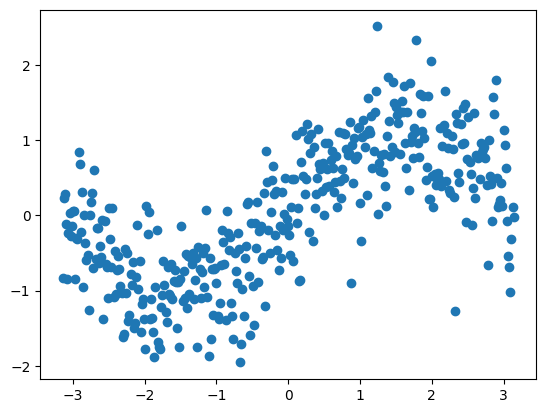

In [ ]:
plt.scatter(x,y)
plt.show()

The main goal would be here to fit a polynomial of degree 3 for predicting the tend of this data.

$$ p(x) =a + b\cdot x +c\cdot x^2 +d\cdot x^3 $$

In [ ]:
# Randomly initialize weights
a = torch.randn((), device=device, dtype=dtype)
b = torch.randn((), device=device, dtype=dtype)
c = torch.randn((), device=device, dtype=dtype)
d = torch.randn((), device=device, dtype=dtype)

learning_rate = 1e-6 # this is actually a hyperparameter
for t in range(2000):
    # Forward pass: compute predicted y
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum().item()
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights using gradient descent
    # a -= lr*grad_a means that a = a - lr*grad_a
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d


print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

99 383.435267609439
199 363.0492621382116
299 344.6509720782849
399 327.6156051234062
499 311.8245756201411
599 297.1856444940237
699 283.6140799558996
799 271.03145297967194
899 259.36514234546894
999 248.5479005081958
1099 238.51745297839733
1199 229.21612781443588
1299 220.59051291706925
1399 212.59113902493323
1499 205.17218647038325
1599 198.29121390265456
1699 191.90890732146065
1799 185.98884788992822
1899 180.4972971119282
1999 175.40299806616545
Result: y = -0.4599799227916904 + 1.2387007673830988 x + 0.08578771879096148 x^2 + -0.14391875936600246 x^3


In [ ]:
def f(x):
    return a + b * x + c * x ** 2 + d * x ** 3 # still we only Pytorch calculations

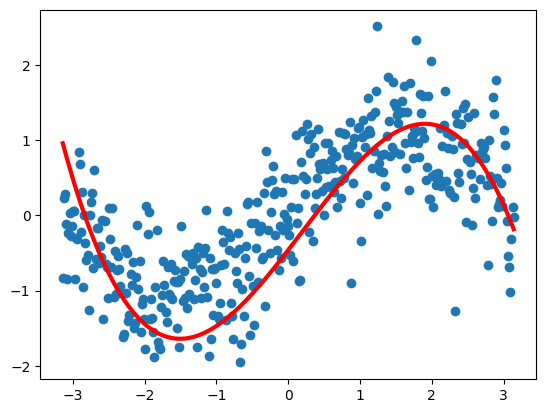

In [ ]:
# we can predict y in the range of x
plt.scatter(x.cpu(), y.cpu(), label='True data')
plt.plot(x.cpu(), f(x).cpu(), 'r-', lw=3, label='Prediction')

## Writing Classes

In [ ]:
class MinMaxScaler:
    def __init__(self):
        self.min = None
        self.max = None

    def fit(self, data):
        """
        Compute the minimum and maximum value of the data for scaling.

        Args:
        - data (torch.Tensor): Input data tensor.
        """
        self.min = torch.min(data, dim=0, keepdim=True).values
        self.max = torch.max(data, dim=0, keepdim=True).values

    def transform(self, data):
        """
        Scale the data based on the computed minimum and maximum values.

        Args:
        - data (torch.Tensor): Input data tensor.

        Returns:
        - torch.Tensor: Scaled data tensor.
        """
        if self.min is None or self.max is None:
            raise ValueError("Scaler has not been fitted yet. Please call 'fit' with appropriate data.")

        scaled_data = (data - self.min) / (self.max - self.min)
        return scaled_data

    def fit_transform(self, data):
        """
        Fit to data, then transform it.

        Args:
        - data (torch.Tensor): Input data tensor.

        Returns:
        - torch.Tensor: Scaled data tensor.
        """
        self.fit(data)
        return self.transform(data)

In [ ]:
# Example usage:
data = torch.tensor([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
print(scaled_data)

tensor([[0.0000, 0.0000],
        [0.5000, 0.5000],
        [1.0000, 1.0000]])


## Exercise

Write a class, using PyTorch, for computing a standard scaling (by z-scores.)

## A Logistic Regression Class - Numpy

In [ ]:
def expit(x):
  return 1 / (1 + np.exp(-x))

In [ ]:
# Define logistic regression model:
class LogisticRegression(object):
    def __init__(self,x,y, lr=0.01):
        self.lr=lr
        n=x.shape[1] # determine the number of independent variables
        self.w=np.ones((1,n))*(0) # initialize weight matrix and set weights to zero
        self.b=0.5 # set starting value for b to 0.5

    def predict(self,x): # returns prediction
        z=x@self.w.T  + self.b   # @: matrix multiplication
        p=expit(z)  # logistic sigmoid function
        return p

    def cost(self, x,y): #cost function
        z=x@self.w.T  + self.b
        p=expit(z)
        return - np.mean(y*np.log(p) + (1-y)*np.log(1-p)) #Cross-entropy cost function

    def step(self,x,y):
        z=x@self.w.T  + self.b
        p=expit(z)

        # Partial derivatives:
        dw= np.mean((p - y)*x, axis=0)    # dJ/dw
        db = np.mean(p-y)               # dJ/db
        self.w = self.w - dw*self.lr # update w
        self.b= self.b- db*self.lr  # update b

    def fit(self,x,y,numberOfEpochs=100000):
        # Create arrays to store weights, biases, costs, predicted y-values for plots..
            #... and predicted y-values for connection lines in:
        self.AllWeights=np.zeros((numberOfEpochs, x.shape[1]))
        self.AllBiases=np.zeros((numberOfEpochs, x.shape[1]))
        self.AllCosts=np.zeros((numberOfEpochs, x.shape[1]))
        self.All_cl= np.zeros((numberOfEpochs,len(x))) # cl: # predicted y-values for connection lines

        for step in range(numberOfEpochs):
            # for each step of gradient descent assign new parameter value to respective array element:
            self.AllWeights[step]=self.w
            self.AllBiases[step]=self.b
            self.AllCosts[step]=self.cost(x,y)
            self.All_cl[step]=(self.predict(x)).T.flatten()
            self.step(x,y) # update parameter values

In [ ]:
# Define some training data:
x_train = np.array([
    [-8.3],
    [-7.1],
    [-4.9],
    [-3.9],
    [-2.7],
    [-1.5],
    [-.9],
    [1.2],
    [2.5],
    [3.6],
    [5.2],
    [6.5],
    [7.8],
    [9.0],
    [9.9],
    [11.2]
])

y_train = np.array([
    [0],
    [0],
    [0],
    [0],
    [0],
    [0],
    [1],
    [0],
    [1],
    [0],
    [1],
    [0],
    [1],
    [1],
    [1],
    [1]
])

In [ ]:
%%time
xs=np.array([np.linspace(-10,12)]) # x-values later used for regression curve plot

# Fit model to training data:
model=LogisticRegression(x_train,y_train, lr=0.01) # set up model and define learning rate
model.fit(x_train,y_train, numberOfEpochs=50000) # set number of epochs

# Store parameter values in new variables:
w=model.AllWeights.T
b= model.AllBiases
c=model.AllCosts
cl=model.All_cl

# Print results:
print("Final weight: "+ str(float(model.w)))
print("Final bias: "+ str(model.b))
print("Final costs: " + str(model.cost(x_train,y_train)))

Final weight: 0.3577707045843588
Final bias: -1.11812276174552
Final costs: 0.40028278018174146
CPU times: user 4.43 s, sys: 92.3 ms, total: 4.52 s
Wall time: 4.48 s


## Exercise - Rewrite the class above with PyTorch instead of NumPy and time its fitting runtime on the same data set.

In [ ]:
# write your code

## A Treat: How to make animations

In [ ]:
!pip install -q celluloid

In [ ]:
# Import libraries:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import celluloid
from celluloid import Camera
from matplotlib import gridspec

In [ ]:
# Regression curve
def pred_curve(xs,w0,b0):  # predict y-values for regression curve
    z=xs.T@w0.T  + b0
    p=expit(z)
    return p

# Create data for surface plot:
def CrossEntropy_cost(x,y,w0,b0):  # returns costs for every pair of w and b.
        p=expit(x @ w0.T + b0)
        return - np.mean(y*np.log(p) + (1-y)*np.log(1-p))

ws = np.linspace(-0.05, 0.75, 40) # set range of values for w ...
bs = np.linspace(-1.75, 0.75, 40)  # ... and b for surface plot
M, B = np.meshgrid(ws, bs) # create meshgrid for surface plot
zs = np.array([CrossEntropy_cost(x_train,y_train,       # determine costs for each pair of w and b
                       np.array([[wp]]), np.array([[bp]]))  # CrossEntropy_cost() only accepts wp and bp as matrices.
               for wp, bp in zip(np.ravel(M), np.ravel(B))])
Z = zs.reshape(M.shape) # get z-values for surface plot in shape of M.

# Define which epochs to plot:
a1=np.arange(0,20,1).tolist()
a2=np.arange(20,100,10).tolist()
a3=np.arange(100,500,100).tolist()
a4=np.arange(500,15000,100).tolist()
#a5=np.arange(40000,60000,20000).tolist()
points_ = a1+a2+a3+a4#+a5

# Create first animation (regression curve & surface plot):
fig = plt.figure(figsize=(10,12)) # create figure
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 1.7]) # set height ratios of subplots

label_font_size = 16 # size of label fonts
tick_label_size= 16 # size of tick labels

# Customize subplots:
ax0=fig.add_subplot(gs[0]) # add first subplot to figure
ax0.set_title("Logistic Regression Curve", fontsize=22) #set title
ax0.tick_params(axis='both', which='major', labelsize=tick_label_size) # set tick label size
ax0.set_xlabel("Value of the input feature", fontsize=label_font_size, labelpad=5) # set axis labels
ax0.set_ylabel("Probability that $y=1$", fontsize=label_font_size, labelpad=5)
ax0.tick_params(axis='both', which='major',
                labelsize=tick_label_size)
ax0.set_ylim([-0.05, 1.2]) # set range for y-values in the plot
ax0.set_yticks([0,0.2,0.4,0.6,0.8, 1]) # set y-axis ticks
ax0.set_yticklabels(["0","0.2","0.4","0.6","0.8", "1.0"], # label y-ticks
                    fontsize=tick_label_size)
ax1=fig.add_subplot(gs[1], projection="3d") # add second subplot
ax1.view_init(elev=25, azim=-70) # set view
ax1.set_xlabel("$\\beta_1$", fontsize=label_font_size, labelpad=16)
ax1.set_ylabel("$\\beta_0$", fontsize=label_font_size, labelpad=16)
ax1.set_zlabel("Cross-Entropy", fontsize=label_font_size, labelpad=13)
ax1.tick_params(axis='both', which='major', labelsize=tick_label_size)
ax1.set_xticks([0, 0.2,0.4,0.6])
ax1.set_xticklabels(["0", "0.2","0.4","0.6"], fontsize=tick_label_size)
ax1.set_yticks([-1.5,-1, -0.5,0,0.5])
ax1.set_yticklabels(["-1.5","-1", "-0.5","0","0.5"], fontsize=tick_label_size)
ax1.set_zticks([0.4,0.6, 0.8,1.0])
ax1.set_zticklabels(["0.4","0.6", "0.8","1.0"], fontsize=tick_label_size)
ax1.tick_params(axis='z', pad=7, which='major', labelsize=tick_label_size)
plt.tight_layout() # adjusts subplots to figure area

camera = Camera(fig)  # create camera
for i in points_:

    # Plot logistic regression curve:
    ys = pred_curve(xs,np.array([w.flatten()[i]]),b.flatten()[i]) #calculate y-values for reg. curve
    leg=ax0.plot(xs.flatten(),ys.flatten(),
                 color='r', label=str(i),lw=2,alpha=1)

    # Scatter plot of training data:
    ax0.scatter(x_train, y_train, color='b',marker='x', s=90) # plot training data points
    ax0.legend(leg,[f'costs: {np.round(c.flatten()[i],3)}'], # customize legend
               loc='upper left', fontsize=18)

    # Plot connecting lines (between predicted y-values and training data points):
    cl_=cl[i]
    for j in range(len(y_train)):
        x,y = [x_train[j],x_train[j]],[float(y_train[j]),cl_[j]]
        ax0.scatter(x,y, color='black',s=0.5)
        ax0.plot(x,y, color='black', linewidth=1.5,
                 linestyle='dashed', alpha=0.4)

    # Surface plot of costs:
    ax1.plot_surface(M, B, Z, rstride=1, cstride=1,
                     alpha=0.80,cmap=cm.coolwarm)

    # Plot trajectory of gradient descent:
    ax1.plot(w.flatten()[0:i],b.flatten()[0:i],
             c.flatten()[0:i], linestyle="dashed",
             linewidth=2.5, color="black")
    ax1.scatter(w.flatten()[i],b.flatten()[i],
                c.flatten()[i], marker="o",s=70*2, color="black")

    # Customize legend:
    ax1.legend(leg,[f'iterations: {i}'],
               loc='upper left', fontsize=18)

    camera.snap() # take snapshot after each frame/iteration

# Create animation:
animation = camera.animate(interval = 500, # set delay between frames in milliseconds.
                          repeat = False, repeat_delay = 0)

In [ ]:
# save the gif file
animation.save('LogisticRegression_Ex_1D.gif',writer='ffmpeg',fps=20,dpi=200)

The final result should look like this:

<figure>
<center>
<img src="https://i.imgur.com/98so2t5.gif"
width='600px' />
<figcaption>Intuition for Logistic Regression</figcaption></center>
</figure>

## The Same Logistic Regression Class - PyTorch

In [2]:
def expit(x):
  return 1 / (1 + torch.exp(-x))

In [59]:
# Define logistic regression model:
class LogisticRegression(object):
    def __init__(self,x,y, lr=0.01):
        self.lr=lr
        n=x.shape[1] # determine the number of independent variables
        self.w=torch.ones((1,n))*(0) # initialize weight matrix and set weights to zero
        self.b=0.5 # set starting value for b to 0.5

    def predict(self,x): # returns prediction
        z=x@self.w.T  + self.b   # @: matrix multiplication
        p=expit(z)  # logistic sigmoid function
        return p

    def cost(self, x,y): #cost function
        z=x@self.w.T  + self.b
        p=expit(z)
        return - torch.mean(y*torch.log(p) + (1-y)*torch.log(1-p)) #Cross-entropy cost function

    def step(self,x,y):
        z=x@self.w.T  + self.b
        p=expit(z)

        # Partial derivatives:
        dw= torch.mean((p - y)*x, axis=0)    # dJ/dw
        db = torch.mean(p-y)               # dJ/db
        self.w = self.w - dw*self.lr # update w
        self.b= self.b- db*self.lr  # update b

    def fit(self,x,y,numberOfEpochs=100000):
        # Create arrays to store weights, biases, costs, predicted y-values for plots..
            #... and predicted y-values for connection lines in:
        self.AllWeights=torch.zeros((numberOfEpochs, x.shape[1]))
        self.AllBiases=torch.zeros((numberOfEpochs, x.shape[1]))
        self.AllCosts=torch.zeros((numberOfEpochs, x.shape[1]))
        self.All_cl= torch.zeros((numberOfEpochs,len(x))) # cl: # predicted y-values for connection lines

        for step in range(numberOfEpochs):
            # for each step of gradient descent assign new parameter value to respective array element:
            self.AllWeights[step]=self.w
            self.AllBiases[step]=self.b
            self.AllCosts[step]=self.cost(x,y)
            self.All_cl[step]=(self.predict(x)).T.flatten()
            self.step(x,y) # update parameter values

In [57]:
# Define some training data:
x_train = torch.tensor([
    [-8.3],
    [-7.1],
    [-4.9],
    [-3.9],
    [-2.7],
    [-1.5],
    [-.9],
    [1.2],
    [2.5],
    [3.6],
    [5.2],
    [6.5],
    [7.8],
    [9.0],
    [9.9],
    [11.2]
],dtype=torch.float)

y_train = torch.tensor([
    [0],
    [0],
    [0],
    [0],
    [0],
    [0],
    [1],
    [0],
    [1],
    [0],
    [1],
    [0],
    [1],
    [1],
    [1],
    [1]
],dtype=torch.long)

In [60]:
%%time
# xs=torch.tensor([torch.linspace(-10,12,steps=50)]) # x-values later used for regression curve plot

# Fit model to training data:
model=LogisticRegression(x_train,y_train, lr=0.01) # set up model and define learning rate
model.fit(x_train,y_train, numberOfEpochs=50000) # set number of epochs

# Store parameter values in new variables:
w=model.AllWeights.T
b= model.AllBiases
c=model.AllCosts
cl=model.All_cl

# Print results:
print("Final weight: "+ str(float(model.w)))
print("Final bias: "+ str(model.b))
print("Final costs: " + str(model.cost(x_train,y_train)))

Final weight: 0.35776257514953613
Final bias: tensor(-1.1181)
Final costs: tensor(0.4003)
CPU times: user 11.8 s, sys: 16.9 ms, total: 11.8 s
Wall time: 11.9 s


In [16]:
xs=torch.linspace(-10,12,steps=50)
xs=xs.reshape(-1,1)

In [18]:
xs.size()

torch.Size([50, 1])

In [61]:
import torch.nn as nn
import torch.optim as optim

class LogisticRegression(nn.Module):
    def __init__(self, input_size):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, 1)

    def forward(self, x):
        out = torch.sigmoid(self.linear(x))
        return out

    def fit(self, X_train, y_train, learning_rate=0.01, epochs=100):
        criterion = nn.BCEWithLogitsLoss()
        optimizer = optim.SGD(self.parameters(), lr=learning_rate)

        for epoch in range(epochs):
            # Forward pass
            outputs = self(X_train)
            loss = criterion(outputs, y_train.float())

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            if (epoch+1) % 5000 == 0:
                print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

    def predict(self, X_test):
        with torch.no_grad():
            outputs = self(X_test)
            predicted = torch.round(torch.sigmoid(outputs))
            return predicted

    def get_coefficients(self):
        with torch.no_grad():
            weights = self.linear.weight.data.numpy().flatten()
            bias = self.linear.bias.data.numpy()
        return weights, bias

In [62]:
# Fit model to training data:
model=LogisticRegression(input_size=1) # set up model and define learning rate
model.fit(x_train,y_train,learning_rate=0.01, epochs=50000) # set number of epochs

Epoch [5000/50000], Loss: 0.6369
Epoch [10000/50000], Loss: 0.6302
Epoch [15000/50000], Loss: 0.6270
Epoch [20000/50000], Loss: 0.6251
Epoch [25000/50000], Loss: 0.6238
Epoch [30000/50000], Loss: 0.6229
Epoch [35000/50000], Loss: 0.6222
Epoch [40000/50000], Loss: 0.6217
Epoch [45000/50000], Loss: 0.6212
Epoch [50000/50000], Loss: 0.6209


In [63]:
 model.get_coefficients()

(array([0.6859627], dtype=float32), array([-3.7348492], dtype=float32))